<h1> KNN CLASSIFICATION OF FACIAL FEATURES </h1>

<h1> Imports </h1>

In [177]:
import cv2
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import random
import seaborn as sns

<h1> A Function For Sorting Our Files </h1>

In [178]:
def sortFiles(List):
    
    
    columns = ['index','Name']
    s = pd.DataFrame(columns)
    
    counter = 0
    
    for ele in List:
        
        s.loc[counter,'index'] = List.index(ele)
        
        ele = ele.replace('/Users/grantpoulsen/Desktop/Facial Recognition/','')
        ele = ele.replace('.jpg','')
        s.loc[counter,'Name'] = ele
        
        counter = counter + 1
        
        
    s = s.sort_values('Name')
    
    return s

<h1> My KNN Algorithm </h1>

In [179]:
#KNN: A KNN Algorithm for working with dataframes 

#Params:
    
    #K: Number of Neighbors to Compare
    
    #test: This should be an unlabeled 
    #subset of our data where the index
    #has remained unchanged and the data
    #has columns: 'width' & 'height'.     <- The Columns Used Could Also be Parameterized, but This is Not Necessary Here

    #data: This should be a labled dataframe 
    #with columns 'width' & 'height'     
    #to comparem the unlabled data with.  <- The Columns Used Could Also be Parameterized, but This is Not Necessary Here
    
def KNN(K,test,data):
    
    #List For Labeling Picture
    classification = []

    #Iterate through each point we're labeling
    for index1, row1 in test.iterrows():
    
        vector1 = np.array([row1['width'],row1['height']])
    
        #Get Data For Comparing
        trainIds = list(range(10))
        trainIds.remove(index1)
        train = data.iloc[trainIds,:]
    
        idx = []
        dist = []
    
        #Get distances between test data and all other data
        for index2, row2 in train.iterrows():
        
            vector2 = np.array(list([row2['width'],row2['height']]))
        
            idx.append(index2)
            dist.append(np.linalg.norm(vector1-vector2))
    
        fourNN = []
        fourNNIdx = []
    
        #Get Four Nearest Neighbors & Their Index
        for i in range(K):
        
            smallestDistance = min(dist)
            correspondingIndex = idx[dist.index(min(dist))]
        
            fourNN.append(smallestDistance)
            fourNNIdx.append(correspondingIndex)
    
            dist.remove(min(dist))
            idx.remove(correspondingIndex)
    
        votes = []
    
        #Get The Four Nearest Neighbors 
        for index in fourNNIdx:
        
            votes.append(train.loc[index,'class'])
    
        mostVotes = max(set(votes), key = votes.count)
    
        classification.append(mostVotes)
    
    test['class'] = classification
    
    return test

<h1> Data Extraction From Images</h1>

In [180]:
#Make DF
column_names = ['picture','width','height','class']
dfFace = pd.DataFrame(columns = column_names)

files = []

#Get File Names
for filepath in glob.iglob('/Users/grantpoulsen/Desktop/Facial Recognition/*'):
    
    files.append(filepath)

#Get File Names in Order
f = sortFiles(files)
files = f['Name'].values

#Split into two types of files: For Getting Ratio of Facial Feature 
#Size Compated to Face Size
faceFiles = files[1::2] 
facialFeatureFiles = files[::2]

#Iter through each file
for i in range(len(facialFeatureFiles)):
    
    #Make Pathway
    featurePath = '/Users/grantpoulsen/Desktop/Facial Recognition/'
    featurePath = featurePath + facialFeatureFiles[i]
    featurePath = featurePath + '.jpg'
    
    #Read Image
    facialFeature = cv2.imread(featurePath)
    
    #Get shpae of facial feature
    lFeature,wFeature,oFeature = facialFeature.shape
    
    #Make Pathway
    facePath = '/Users/grantpoulsen/Desktop/Facial Recognition/'
    facePath = facePath + faceFiles[i]
    facePath = facePath + '.jpg'
    facePath = facePath.replace('.jpeg','')
    
    #Read Image
    face = cv2.imread(facePath)
    
    #Get shape of face
    lFace,wFace,oFace = face.shape
    
    
    #Finalize Data Before Throwing into DF
    pic = facialFeatureFiles[i]
    
    width = wFeature/wFace
    height = lFeature/lFace
    
    cls = pic.replace('Grant ','')
    cls = cls.replace('Grandma ','')
    cls = cls.replace('Sam','')
    cls = cls.replace('Gretta','')
    cls = cls.replace('Maya','')
    
    #Append
    dfFace = dfFace.append({'picture':pic, 'width':width , 'height':height, 'class':cls}, ignore_index=True)


In [181]:
print(dfFace)

               picture     width    height         class
0        Grandma Frown  0.507143  0.128205         Frown
1  Grandma Smile Teeth  0.547445  0.229885   Smile Teeth
2          Grant Frown  0.473934  0.157692         Frown
3    Grant Smile Teeth  0.575000  0.203187   Smile Teeth
4         Gretta Frown  0.513636  0.136531         Frown
5   Gretta Smile Teeth  0.587983  0.208481   Smile Teeth
6           Maya Frown  0.581281  0.131579         Frown
7     Maya Smile Teeth  0.648515  0.194245   Smile Teeth
8            Sam Frown  0.511450  0.147436         Frown
9      Sam Smile Teeth  0.498141  0.178218   Smile Teeth


<h1> Plot Width Ratio vs Height Ratio</h1>

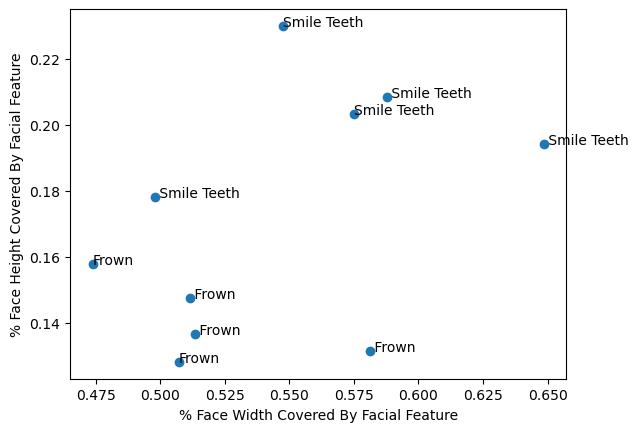

In [182]:
#Scatter Pts. 
plt.scatter(dfFace['width'],dfFace['height'])


#Label Pts.
counter = 0

for c in dfFace['class'].values:
    
    plt.text(dfFace.loc[counter,'width'],dfFace.loc[counter,'height'],c)
    counter = counter + 1
  
#Set Axis
plt.xlabel('% Face Width Covered By Facial Feature')
plt.ylabel('% Face Height Covered By Facial Feature')
plt.show()

<h1> Make Subset of Data for Testing That's Unlabled </h1>

In [183]:
testIds = list(range(10))
test = dfFace.iloc[testIds,:]
test = test.drop('class', axis = 1)

In [184]:
print(test)

               picture     width    height
0        Grandma Frown  0.507143  0.128205
1  Grandma Smile Teeth  0.547445  0.229885
2          Grant Frown  0.473934  0.157692
3    Grant Smile Teeth  0.575000  0.203187
4         Gretta Frown  0.513636  0.136531
5   Gretta Smile Teeth  0.587983  0.208481
6           Maya Frown  0.581281  0.131579
7     Maya Smile Teeth  0.648515  0.194245
8            Sam Frown  0.511450  0.147436
9      Sam Smile Teeth  0.498141  0.178218


<h1> Run KNN W/ 4 </h1>

In [185]:
test = KNN(4,test,dfFace)
print(test)

               picture     width    height         class
0        Grandma Frown  0.507143  0.128205         Frown
1  Grandma Smile Teeth  0.547445  0.229885   Smile Teeth
2          Grant Frown  0.473934  0.157692         Frown
3    Grant Smile Teeth  0.575000  0.203187   Smile Teeth
4         Gretta Frown  0.513636  0.136531         Frown
5   Gretta Smile Teeth  0.587983  0.208481   Smile Teeth
6           Maya Frown  0.581281  0.131579         Frown
7     Maya Smile Teeth  0.648515  0.194245   Smile Teeth
8            Sam Frown  0.511450  0.147436         Frown
9      Sam Smile Teeth  0.498141  0.178218         Frown


<p> 90 percent accuracy... Not Bad! Let's optimize this! </p>

<h1> Optimization </h1>

In [186]:

k = []
k = list(range(1,10))
scores = []

for i in range(1,10):
    
    test = KNN(i,test,dfFace)
    
    correct = 0
    total = 0
    for index,row in test.iterrows():
        
        actual = row['picture']
        
        actual = actual.replace('Grandma ','')
        actual = actual.replace('Grant ','')
        actual = actual.replace('Gretta ','')
        actual = actual.replace('Maya ','')
        actual = actual.replace('Sam ','')
        actual = actual.replace(' ','')
        
        guess = row['class']
        guess = guess.replace(' ','')
        
        if(guess == actual):
            
            correct = correct + 1
            
        total = total + 1

    score = correct/total
    scores.append(score)


<h1> Plot Findings </h1>

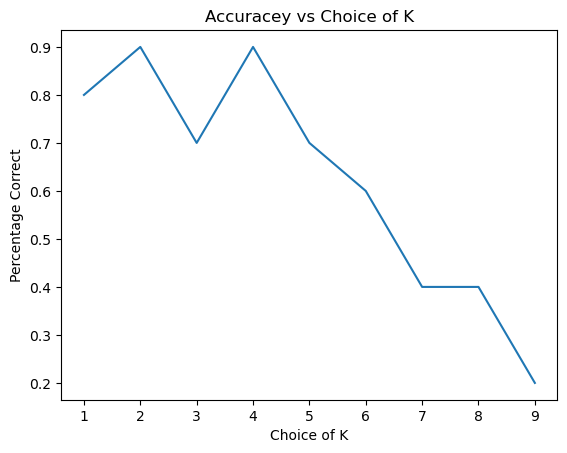

In [187]:
plt.plot(k,scores)
plt.title('Accuracey vs Choice of K')
plt.ylabel('Percentage Correct')
plt.xlabel('Choice of K')
plt.show()